In [1]:
import pandas as pd
import numpy as np
#import importlib

# Show all pandas rows/cols:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

# Wide display:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import data_prep as dp
import data_analysis as da
#importlib.reload(dp)
#importlib.reload(da)

# Data load and prep:

In [2]:
print('Getting df...')
df = dp.return_dataset()
print('Getting word dict...')
words_dict = da.get_words_dict(list(df['sentence']))
print(f'Done! There are [{len(words_dict)}] distinct words used in the texts and the df containts a total of [{len(df)}] sentences')
print('Showing a sample of the df:')
df.sample(2)

Getting df...
Getting word dict...
Done! There are [17393] distinct words used in the texts and the df containts a total of [36319] sentences
Showing a sample of the df:


,sentence,NUM,LIBRARY,AUTHOR,TEXT_NAME,TRANSLATION,AUTHOR_LIBRARY,char_count,words_count
18605,"thou sawest till that a stone was cut out without hands , which smote the image upon his feet th...",026,OT,Daniel,The Book of Daniel,King James,Daniel_OT,147,31
20994,"and he taught , saying unto them , is it not written , my house shall be called of all nations t...",040,NT,StMark,The Gospel According to Saint Mark,King James,StMark_NT,153,35


# Word Freq and Count comparison:

<hr>

<h2>The used metrics</h2>
Two simple and reliable metrics to compare different author styles are:<br>
- <b>Word Count Diff</b>: The author uses Long or Short sentences? <br>
Measure how much words an average sentence of the authors has, and look at word count difference between the two authors (<i>for example, author A uses 60 words in a sencence on average, while author B uses only 15 - author B uses significantly shorter sencences than author A</i>)<br>
- <b>Word Freq Diff</b>: What words the author uses? 
<br>Get a list of every word used by both authors, rate the frequency of usage of every word by both authors and take the average of the differences between every word (<i>for example, author A uses the word "love" frequently, while author B doesn't, but uses the word "pain" very much, while author A doesn't</i>)<br>

<hr>

<h2>The experiment</h2>
- <b>Rate the Bible authors</b>: for every author in the Bible, compare his style with the style of the rest of the Bible. This way we will get the bounds of <b style="color:purple">acceptable deviations</b><br>
- <b>Rate the Control authors</b>: now compare the styles of the two Control authors, which have nothing to do with Christianity, and compare them with the Bible. Make sure they are out of the <b style="color:purple">acceptable deviations</b><br>
- <b>Rate the Nag Hammadi texts authors</b>: compare the Nag Hammadi authors and check whether they are <b style="color:green">within</b> or <b style="color:red">out of</b> the <b style="color:purple">acceptable deviations</b><br>

<hr>

In [3]:
results = da.freq_compare_with_Bible_loop(df, words_dict, texts='all')
results.sample(5)

Comparing all texts...
- Done!


,TEXT,LIBRARY,AUTHOR,TRANSLATION,AUTHOR_LIBRARY,freq_diff,word_diff
12,The First Book of the Chronicles,OT,Unknown,King James,Unknown_OT,-10.081767,-2.202764
59,The Second General Epistle of Peter,NT,StPeter,King James,StPeter_NT,-9.955924,10.263494
107,Trimorphic Protennoia,NH,Unknown,John D,Unknown_NH,-9.876469,-10.144763
94,The Teachings of Silvanus,NH,Silvanus,Malcolm L,Silvanus_NH,-9.819486,-14.368183
22,The Book of the Prophet Jeremiah,OT,Jeremiah,King James,Jeremiah_OT,-10.599906,10.685469


<hr>
<h2>Plotting the results</h2>
- Once we've performed the experiments and rated every authors <b style="color:blue">Word Freq Diff</b> and <b style="color:green">Word Count Diff</b>, lets plot the results on the <b style="color:blue">X</b> and <b style="color:green">Y</b> axis<br> 
<hr>

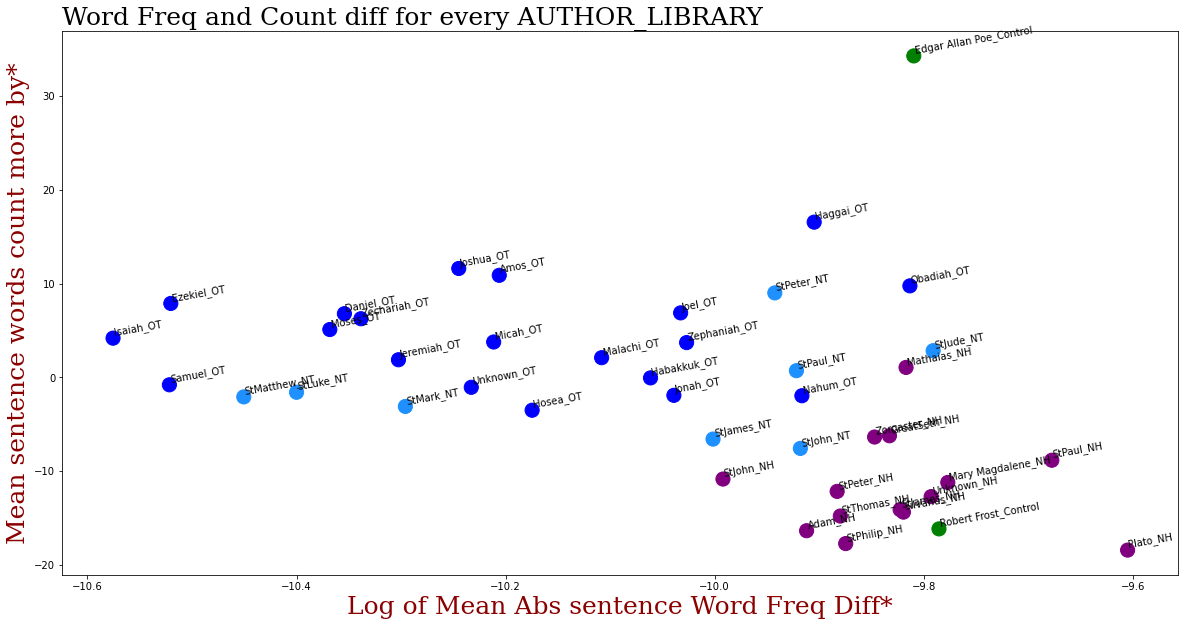

*between the [AUTHOR_LIBRARY] and the Bible (or with the rest of the Bible excluding the text, if the text is part of the Bible itself)
- Dark Blue: The Bible - Old Testament
- Light Blue: The Bible - New Testament
- Purple: Nag Hammadi
- Green: Control group


In [4]:
da.word_freq_and_count_plot(results, who='AUTHOR_LIBRARY')

<hr>
<h2>Proving that Nag Hammadi is not part of the Bible</h2>
- <b>Zero hypothesis (H0)</b>: <br>
Nag Hammadi/Gnostic texts and Bible texts are part of the Bible <br>
- <b>Permutation test to reject H0</b>: <br>
Since we now have every author rated by Word Count Diff and by Word Freq Diff from the (rest of) the Bible, we can do a parmutation test to get the probability that H0 is right (<b>P(H0)</b>). <br>
If the P(H0) is less than 5%, both by Word Count and the Word Freq, we will prove that Nag Hammady text differ so much by style from the Bible that they cannot be part of the Bible.
<hr>

### - Get P-value for H0 by word_diff:

In [5]:
by = 'word_diff' # 'freq_diff' or 'word_diff'
da.perm_test(full_sim_sample=results.loc[results.LIBRARY.isin(['OT', 'NT'])][by], 
          real_sample=results.loc[results.LIBRARY.isin(['NH'])][by], 
          P=10000, 
          rounder_dgts=10)

Doing permutation test for real sample of lenght [45] and [10000] permutations...
- real_mean_dif: 13.2436649
- sims_mean_dif (ave): 1.5201269113
- P-value based on mean |difs: [0.0%]

Normal hypothesis confirm:
- P-value based on mean is smaller than [5.0%], aka Zero-Hypothesis may be True: [False]


0.0

### - Get P-value for H0 by freq_diff:

In [7]:
by = 'freq_diff' # 'freq_diff' or 'word_diff'

da.perm_test(full_sim_sample=results.loc[results.LIBRARY.isin(['OT', 'NT'])][by], 
          real_sample=results.loc[results.LIBRARY.isin(['NH'])][by], 
          P=10000, 
          rounder_dgts=10)

Doing permutation test for real sample of lenght [45] and [10000] permutations...
- real_mean_dif: 0.3142495
- sims_mean_dif (ave): 0.042585953
- P-value based on mean |difs: [0.0%]

Normal hypothesis confirm:
- P-value based on mean is smaller than [5.0%], aka Zero-Hypothesis may be True: [False]


0.0

<hr>
<h2>Conclusion</h2>
- <b>Perm test</b>: It was proven by two separate permutation tests on two different metrics that Nag Hammadi texts cannot be part of the Bible<br>
- <b>Visual</b>: The fact that the two groups of texts cannot be a part of the same distrubution is also clearly visible by the Word Freq vs Word Count plot<br>
<hr>